<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_05/KoNLPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[파이썬 한국어 NLP](https://konlpy.org/ko/latest/index.html)**

In [ ]:
# prompt: 한글폰트가 꺠지지 않게 시각화하는 코드

# Install necessary libraries
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
! pip install konlpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 17.1 MB/s eta 0:00:00


In [1]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.sentences('네, 안녕하세요. 반갑습니다.')

['네, 안녕하세요.', '반갑습니다.']

In [2]:
kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']

In [3]:
kkma.pos(u'오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^')

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]

In [110]:
from konlpy.tag import Okt

# Okt Class의 생성자를 이용하여 분석기를 생성
okt = Okt()

In [96]:
# prompt: scripts.txt 를 script 변수로 읽어줘

with open('scripts.txt', 'r') as file:
    script = file.read()


In [111]:
# prompt: scripts를 나쁜사람과 착한사람을 label로 하고 'label' 컬럼으로 하고 ':'이후 대사는 'content' 컬럼으로 각각 생성하고 데이터프레임으로 만들어줘

import pandas as pd

data = []
for line in scripts.strip().split('\n'):
    if line:
        label, content = line.split(':', 1)
        data.append({'label': label.strip(), 'content': content.strip()})

df = pd.DataFrame(data)
df

,label,content
0,😈 나쁜 사람,조용히 명령을 따르기만 해.
1,😇 착한 사람,누구도 포기하지 않을 거야.
2,😈 나쁜 사람,모든 건 쓸모없어.
3,😇 착한 사람,우리는 모든 존재는 의미가 있어.
4,😈 나쁜 사람,힘이 없으면 처벌을 각오해.
...,...,...
195,😇 착한 사람,"설령 아파도, 모든 존재는 의미가 있어."
196,😈 나쁜 사람,너 같은 건 룰을 따르기만 하면 돼.
197,😇 착한 사람,난 빛은 남아 있어. 난 지킬 거야.
198,😈 나쁜 사람,모든 건 굴복해.


In [112]:
df['content'][:5].apply(lambda x: ' '.join(okt.nouns(x)))

,content
0,명령 해
1,누구 포기
2,모든 건
3,우리 모든 존재 의미
4,힘 처벌 오해


In [113]:
# prompt: kkma.nouns()사용하여 content에서 단어를 추출하여 conuntervector로 수치화하고 df에 협쳐줘

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Extract nouns using kkma.nouns() and create a new column 'nouns'
df['nouns'] = df['content'].apply(lambda x: ' '.join(okt.nouns(x)))
df

,label,content,nouns
0,😈 나쁜 사람,조용히 명령을 따르기만 해.,명령 해
1,😇 착한 사람,누구도 포기하지 않을 거야.,누구 포기
2,😈 나쁜 사람,모든 건 쓸모없어.,모든 건
3,😇 착한 사람,우리는 모든 존재는 의미가 있어.,우리 모든 존재 의미
4,😈 나쁜 사람,힘이 없으면 처벌을 각오해.,힘 처벌 오해
...,...,...,...
195,😇 착한 사람,"설령 아파도, 모든 존재는 의미가 있어.",설령 모든 존재 의미
196,😈 나쁜 사람,너 같은 건 룰을 따르기만 하면 돼.,너 건 룰
197,😇 착한 사람,난 빛은 남아 있어. 난 지킬 거야.,난 빛 남아 난
198,😈 나쁜 사람,모든 건 굴복해.,모든 건 굴복


In [114]:
# Use CountVectorizer to convert the nouns into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['nouns'])

# Create a new DataFrame from the numerical features
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_vectorized

,가치,공존,굴복,그냥,기적,남아,누구,누군가,명령,모든,...,자격,절망,존재,처벌,치유,침묵,파괴,포기,희망,희생
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# prompt: df와 df_vectorized를 merge해줘

import pandas as pd
# Assuming df and df_vectorized are already defined as in the previous code

# Merge df and df_vectorized based on their index
df_merged = pd.concat([df, df_vectorized], axis=1)
df_merged


,label,content,nouns,가치,공존,굴복,그냥,기적,남아,누구,...,자격,절망,존재,처벌,치유,침묵,파괴,포기,희망,희생
0,😈 나쁜 사람,조용히 명령을 따르기만 해.,명령 해,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,😇 착한 사람,누구도 포기하지 않을 거야.,누구 포기,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,😈 나쁜 사람,모든 건 쓸모없어.,모든 건,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,😇 착한 사람,우리는 모든 존재는 의미가 있어.,우리 모든 존재 의미,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,😈 나쁜 사람,힘이 없으면 처벌을 각오해.,힘 처벌 오해,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,😇 착한 사람,"설령 아파도, 모든 존재는 의미가 있어.",설령 모든 존재 의미,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
196,😈 나쁜 사람,너 같은 건 룰을 따르기만 하면 돼.,너 건 룰,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,😇 착한 사람,난 빛은 남아 있어. 난 지킬 거야.,난 빛 남아 난,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
198,😈 나쁜 사람,모든 건 굴복해.,모든 건 굴복,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# prompt: df_merged 에서 content와 nouns 컬럼을 제거해줘

# Drop the 'content' and 'nouns' columns from df_merged
df_merged = df_merged.drop(columns=['content', 'nouns'])
df_merged


,label,가치,공존,굴복,그냥,기적,남아,누구,누군가,명령,...,자격,절망,존재,처벌,치유,침묵,파괴,포기,희망,희생
0,😈 나쁜 사람,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,😇 착한 사람,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,😈 나쁜 사람,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,😇 착한 사람,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,😈 나쁜 사람,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,😇 착한 사람,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
196,😈 나쁜 사람,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,😇 착한 사람,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,😈 나쁜 사람,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# prompt: label을 수치화해줘

# Assuming df_merged is already defined as in the previous code

# Convert 'label' column to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_merged['label'] = le.fit_transform(df_merged['label'])
df_merged


,label,가치,공존,굴복,그냥,기적,남아,누구,누군가,명령,...,자격,절망,존재,처벌,치유,침묵,파괴,포기,희망,희생
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
196,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# prompt: label로 소팅해줘

# Sort the DataFrame by the 'label' column
df_merged_sorted = df_merged.sort_values(by='label')
df_merged_sorted


,label,가치,공존,굴복,그냥,기적,남아,누구,누군가,명령,...,자격,절망,존재,처벌,치유,침묵,파괴,포기,희망,희생
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
196,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


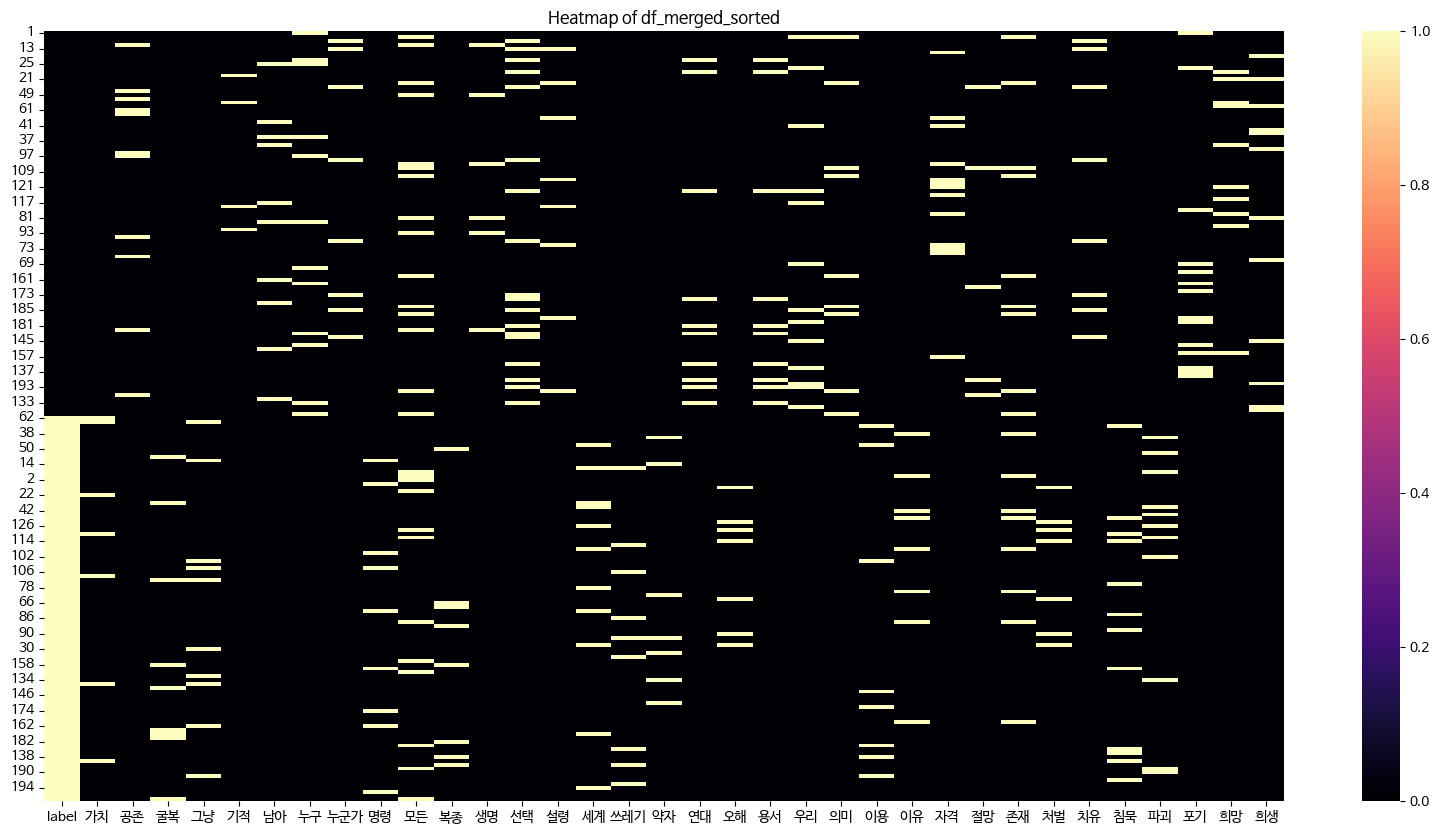

In [126]:
# prompt: df_merged_sorted를 seaborn을 사용하여 heatmap으로 만들어줘

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10)) # Adjust figure size as needed
sns.heatmap(df_merged_sorted, cmap='magma')
plt.title('Heatmap of df_merged_sorted')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


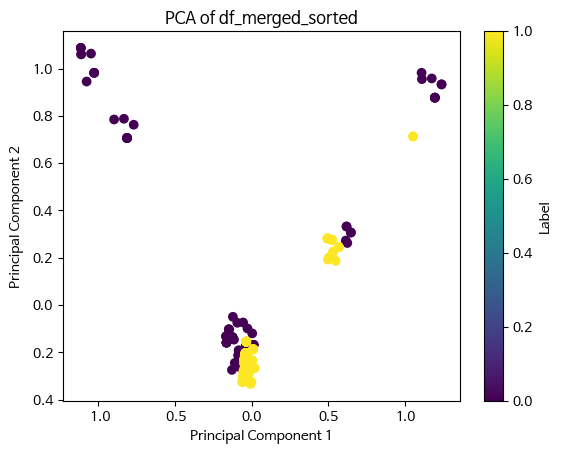

In [128]:
# prompt: df_merged_sorted를 2차원으로 주성분분석으로 시각화 하려고해.

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_merged_sorted is already defined as in the previous code

# Apply PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_merged_sorted.drop(columns=['label']))

# Create a scatter plot of the principal components, colored by the 'label' column
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_merged_sorted['label'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of df_merged_sorted')
plt.colorbar(label='Label')
plt.show()


### **실습과제**

In [129]:
import requests

url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt"
filename = "ratings.txt"

response = requests.get(url)

with open(filename, "w", encoding="utf-8") as f:
    f.write(response.text)

print(f"파일 다운로드 완료: {filename}")


파일 다운로드 완료: ratings.txt


In [132]:
# prompt: response를 읽어주는 코드

import pandas as pd

# Read the downloaded file into a pandas DataFrame
df_ratings = pd.read_csv(filename, sep='\t')

# Display the first few rows of the DataFrame
df_ratings

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [138]:
df = df_ratings.sample(frac=0.01)
df

,id,document,label
126987,322505,이게 수입되다니...,0
91526,9399803,hit chicken and silent tribute,1
111308,4499837,너무 쉬운 스토리에 재미없고 지루하고...괜히 봤어...괜히 봤어,0
74071,815543,불꽃놀이 정말 넘~ 좋아요~~ >ㅅ신고,1
59752,5448509,진짜웃기고재밍는데..평점이쫌낮네?!/급마무리가살.짝.아쉽지만!,1
...,...,...,...
160618,4123114,"정말 뼈아픈 말이 되겠지만...이 정도 그림체,스토리로는 일본 발톱끝도 못 쫓아간다.",0
153216,5348736,갉작갉작 긁다 보니 어느새 바닥.,0
132451,9218052,이런 영화를 극장에서 개봉했다니 믿을수없음 티비드라마보다도 못한 스토리에 보기민망한 cg,0
76157,2574951,이거도 정말 재밌었는데 ㅋㅋ 남상미도 나와서 좋았음 @.@,1


In [141]:
df['nouns'] = df['document'].apply(lambda x: ' '.join(okt.nouns(x)))

# Use CountVectorizer to convert the nouns into numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['nouns'])

# Create a new DataFrame from the numerical features
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df_merged = pd.concat([df, df_vectorized], axis=1)

df_merged = df_merged.drop(columns=['document', 'nouns'])
df_merged_sorted = df_merged.sort_values(by='label')

In [145]:
# prompt: df_merged_sorted의 Nan을 0으로 변경해줘

df_merged_sorted = df_merged_sorted.fillna(0)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


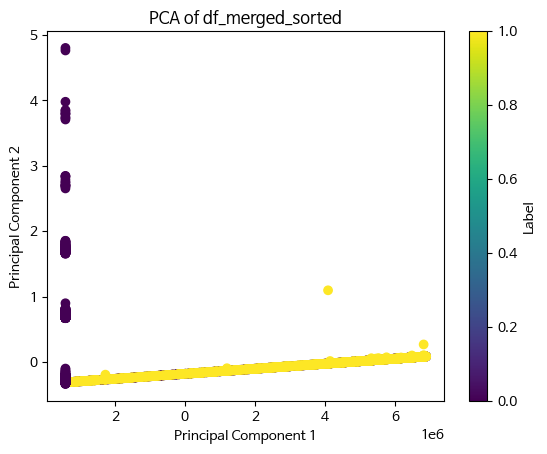

In [146]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_merged_sorted.drop(columns=['label']))

# Create a scatter plot of the principal components, colored by the 'label' column
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_merged_sorted['label'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of df_merged_sorted')
plt.colorbar(label='Label')
plt.show()

### **코사인 유사성(Cosine Similarity)**
<img src ='https://www.researchgate.net/publication/369392869/figure/fig1/AS:11431281128862736@1679432114524/Cosine-Similarity-using-Word2Vec.png'>